## Solutions Q 1 - 7

In [1]:
# import all python add-ons etc that will be needed later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                         # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 14})  # set font size for plots

### Q1 answer
The ratio test gives $\displaystyle r=\left|\frac{x^{n+1}n!}{(n+1)!x^n}\right|= \frac{|x|}{n} $ and in the limit when $n \rightarrow \infty$ then $r \rightarrow 0$ so the series is convergent for any value of $x$.

### Q2 answer
Starting with $1/(1+x)$, differentiating once produces $-1/(1 + x)^2$ and twice $2/(1 + x)^3$. Therefore, the expansion required can be found by differentiating the series expansion of $1/(1 + x)^2$. This was calculated in, equation (5.5), and produces the answer with the substitution $x \rightarrow ax$.

The expansion of $1/(1 + ax)^2$ is

$$\displaystyle 1 - 2ax + 3a^2x^2 - 4a^3x^3 + \cdots + (-1)^{n-1}na^{n-1}x^{n-1} + \cdots $$

and differentiating produces

$$\displaystyle -2a/(1+ax)^3 =-2a+6a^2x-12a^3x^2 +\cdots  +(-1)^n\frac{n(n-1)}{2}a^{n-1}x^{n-2} + \cdots $$

the series is then

$$\displaystyle  \frac{1}{(1+ax)^3} = 1-3ax+6a^2x^2-10a^3x^3 \cdots + (-1)^n\frac{n(n-1)}{2}a^{n-2}x^{n-2}+ \cdots$$

Using symbolic algebra, as shown below we can confirm the calculation. The 'big O' notation means that the series was terminated before the $x^6$ term.

In [2]:
#  using symbolic algebra SymPy to find the series, infinity is oo (two lc letter o together)
x, a = symbols('x, a')         
f01 = (1/(1 + a*x)**3 )
series(f01,x)

### Q3 answer
The average is found by using eqn. 6,  $\displaystyle \langle x \rangle= \sum xp(x)/\sum p(x)$ the quantity $x$ is the mass and $p$ the fraction of the isotope present. Because the _fractions_ add to unity, only the numerator need be evaluated.  The final number is rounded to 6 decimal places, the same as each value. 

In [3]:
# the simple sum could be made, instead a general way of summing data is illustrated

x = [203.973020,  205.974440 , 206.975872 , 207.976627]  # 
f = [0.0140,  0.241 , 0.221,  0.524]
n = len(f)
av = sum([x[i]*f[i] for i in range(n)])
av2= sum([x[i]**2*f[i] for i in range(n)])

print('{:s}{:12.6f}{:s}{:1.6f}'.format('average = ',av,', std dev = ',np.sqrt(av2-av**2)))

average =   207.216883, std dev = 0.913584


The std deviation, $\sqrt{\langle x \rangle-\langle x^2\rangle}$, is large because the wide range of masses and their fractions. The data is not the result measuring the same thing many times, which is necessary in a statistical measurement, but the average of disparate things, in this case the different isotopes. The precision of the individual masses reflects the effect of many measurements. The std deviation should be rounded to $0.9$ making the average $207.2 \pm 0.9$. However, it would be acceptable to give the answer as $207 \pm 1$ to err on the cautious side and considering that the percentage abundance is only known to three figures.

### Q4 answer 
A die has six sides and the chance of it falling on any side is equal, if it is a fair die. The average of the numbers produced is then the sum,

$$\displaystyle \langle x \rangle = 1/6 + 2/6 + 3/6 + 4/6 + 5/6 + 6/6 = 21/6 = 3.5$$

The sum $\sum p(x) = \sum_1^6 1/6 = 1$ and clearly need not be included in the denominator. The average squared is $1/6 + 4/6 + 9/6 + 16/6 + 25/6 + 36/6 = 91/6 = 15.16$ and the dispersion or variance in the average value is $\sigma^2 \approx$ 2.92. The standard deviation $\sigma \approx$ 1.7. The average value is therefore $3.5 \pm 1.7$.

If there are two dice there are $6^2 = 36$ possible outcomes, but some are the same as others; $1 + 2$ is the same as $2 + 1$ and so forth. Therefore, there are six values when the numbers are the same and fifteen values each to be doubled. This can be visualized in this case as a matrix of numbers whose entries are the sum of the row or column index, $1 \to 6$; The matrix of numbers is shown below.

In [4]:
n = 6
p = [ [i+j for i in range(1,n+1)] for j in range(1,n+1)]

for j in range(n):
    print(j,p[j][:])

0 [2, 3, 4, 5, 6, 7]
1 [3, 4, 5, 6, 7, 8]
2 [4, 5, 6, 7, 8, 9]
3 [5, 6, 7, 8, 9, 10]
4 [6, 7, 8, 9, 10, 11]
5 [7, 8, 9, 10, 11, 12]


The average value of many throws is made by adding up the entries in the matrix and dividing by $n^2$. If $i$ and $j$ are row and index then the formula is

$$\displaystyle \langle x\rangle = \frac{1}{n^2}\sum_{i=1}^n\sum_{j=1}^n(i+j) =\frac{2}{n^2}\sum_{i=1}^n i+\frac{2}{n^2}\sum_{i=2}^n\sum_{j=1}^{i-1}(i+j)$$

The first term is the 'brute force' method; just add up all the terms, 1 + 1, 1 + 2, etc. The double summation has indices, $i = 1,\,j = 1,\, 2\cdots 6$ then $i = 2,\, j = 1, 2 \cdots 6$, and so forth. The second equation adds just the six terms when equal values occur on each die, the diagonal terms in the matrix, and the last term all the remaining ones.

In [5]:
n = 6
p = [[i+j for i in range(1,n+1)] for j in range(1,n+1)]   # range 1 to 6, make 2D array of numbers i+j.
av_x =  np.sum( np.sum(p,axis=0))/n**2                    # <x> sum array rows , cols in turn   

p2 =[[(i+j)**2 for i in range(1,n+1)] for j in range(1,n+1)]
av_x2 = np.sum( np.sum(p2,axis=0))/n**2                   # <x^2> 

print('{:s}{:10.3f}{:s}{:10.3f}'.format('average = ',av_x,', std dev = ',np.sqrt(abs(av_x2 - av_x**2))))

average =      7.000, std dev =      2.415


as expected the average is twice that for a single die, but the standard deviation is only $ \sqrt{2}$ bigger not double.

### Q5 answer
Using the formula from the previous answer, with $n = 10$ and modified to count from $0 \to 9$, ( not $1 \to 6$ ) the values for one die are $\langle x \rangle = 4.5,\,\langle x^2 \rangle = 57/2$, and $\sigma= 2.87$, and for two $\langle x \rangle = 9, \,\langle x^2 \rangle = 97.5$  and $\sigma = 4.06$.

### Q6 answer 
(a) Writing down the partition function directly, equation (11), produces $\displaystyle Z = \sum_{n=0}^\infty e^{-E_n/k_BT} = \sum_{n=0}^\infty e^{-nh\nu/k_BT}$

Next substitute $e^{-h\nu/k_BT} = x $ and recognize the expression as being the same as the series $\sum_{n=0}^\infty x^n = (1-x)^{-1}$. Substituting back produces 

$$\displaystyle  Z=\frac{1}{1-e^{-h\nu/k_BT}}$$

(b) In the harmonic oscillator, separate out the constant term ($\displaystyle e^{-h\nu/2k_BT}$ ) in the summation as follows

$$\displaystyle Z = \sum_{n=0}^\infty e^{-(n+1/2)h\nu/k_BT} = e^{-h\nu/2k_BT} \sum_{n=0}^\infty e^{-nh\nu/k_BT}$$

The result is then similar to that of part (a) and the result is by inspection

$$\displaystyle  Z=\frac{e^{-h\nu/2k_BT}}{1-e^{-h\nu/k_BT}}$$

The term $h\nu/k_B$ has units of temperature, is often called the _vibrational temperature_ and given the symbol $\theta$. Its values range from $3551$ K for $\mathrm {N_2}$ to $308$ K for $\mathrm{I_2}$ molecules.

(c) If the _vibrational temperature_ is much greater than room temperature, $\approx$ 300 K, only the lowest energy level is populated to a significant extent. Therefore for $\mathrm {N_2}$, which has large vibrational quanta because it has a large bond force constant, the lowest level is almost exclusively populated, but in $\mathrm {I_2}$ several levels are populated as here the energy gaps between vibrational levels are far smaller relative to the temperature $T$.

The direct calculation of the relative population starts from equation (12), which is modified so as to use $\theta$. Notice that to obtain the frequency in wavenumbers ($\mathrm{cm^{-1}}$), $h$ is multiplied by $c$.

In [6]:
# calculation part (c) 
# Z = lambda nu:np.exp(-h*c*nu/(2*kB*T))/(1.0-np.exp(-h*c*nu/(kB*T)))   # normal equation 
Z = lambda theta:np.exp(-theta/(2*T))/(1.0 - np.exp(-theta/T))          # in terms of theta
                       
kB= 1.38054e-23          # J /K
h = 6.62559e-34          # SI units  Js
c = 2.997925e10          # cm/s
T = 300.0                # K
thetaN = 3394.6          # K nitrogen

nmax = 7
pN = [ np.exp(-(n+0.5)*thetaN/T)/Z(thetaN) for n in range(0,nmax) ]     # relative population

thetaI = 308.7           # K Iodine
pI = [ np.exp(-(n+0.5)*thetaI/T)/Z(thetaI) for n in range(0,nmax) ]

print('{:s}{:6.2f}{:s}'.format(' Nitrogen frequency ',thetaN*kB/(h*c), ' cm^(-1)'))
print('{:s}{:6.2f}{:s}'.format(' Iodine frequency   ',thetaI*kB/(h*c), ' cm^(-1)'))
print('\n Relative populations for the first few energy levels\n')
print('{:s}'.format('   n        Nitrogen         Iodine'))
for i in range(nmax):
    print('{:4d} {:15.5g} {:15.5f}'.format(i, pN[i],pI[i]))
    
print('\n{:s}{:f}{:s}{:f}'.format('total population N2 =  ', sum(pN), ' and I2 = ',sum(pI)))

 Nitrogen frequency 2359.35 cm^(-1)
 Iodine frequency   214.56 cm^(-1)

 Relative populations for the first few energy levels

   n        Nitrogen         Iodine
   0         0.99999         0.64264
   1      1.2185e-05         0.22966
   2      1.4846e-10         0.08207
   3       1.809e-15         0.02933
   4      2.2042e-20         0.01048
   5      2.6857e-25         0.00375
   6      3.2725e-30         0.00134

total population N2 =  1.000000 and I2 = 0.999256


### Q7 answer 
(a) The probability distribution for energy $E_n$ is that of Boltzmann’s distribution $\displaystyle e^{-E_n/k_BT}$. The average number of photons $n$ with total energy $nh\nu$ is therefore

$$\displaystyle \langle n\rangle =\frac{\sum\limits_{n=0}^\infty ne^{-nh\nu/k_BT}}{ \sum\limits_{n=0}^\infty e^{-nh\nu/k_BT}}$$

The summation in the denominator is just the partition function worked out in equation (12), which is $\displaystyle Z = (1 - e^{-h\nu/k_BT})^{-1}$ and the numerator is 

$$\displaystyle \sum_{n=0}^\infty ne^{-nh\nu/k_BT} = \sum_{n=0}^\infty n(e^{-h\nu/k_BT} )^n$$

This does not look very encouraging at first, but with a bit of cunning this can be rewritten in another form by removing a constant term $e^{h\nu/k_BT}$ from the summation. The result is

$$\displaystyle  \sum_{n=0}^\infty n(e^{-h\nu/k_BT})^n =e^{+h\nu/k_BT} \sum_{n=0}^\infty n(e^{-h\nu/k_BT})^{n-1} $$

Now by substituting $\displaystyle e^{-h\nu/k_BT} = x$, the summation becomes $\displaystyle x\sum nx^{n-1}$ which is the derivative of the sum of $x^n$ multiplied by $x$. This means that the summation is calculable from the derivative of $1/(1 - x)$ which is $1/(1 - x)^2$. The result of the summation is therefore,

$$\displaystyle  \sum_{n=0}^\infty ne^{-nh\nu/k_BT}= \frac{e^{-h\nu/k_BT} }{(1-e^{-h\nu/k_BT})^2 }  $$

making 

$$\displaystyle  \langle n \rangle =\frac{e^{-h\nu/k_BT}(1-e^{-h\nu/k_BT})}{(1-e^{-h\nu/k_BT})^2} = \frac{1}{e^{+h\nu/k_BT}-1} $$

where the last part involves a little re-arranging. Notice that $\langle n \rangle$ is zero when $T \to 0$  as expected and tends to infinity when $T$ is large and this is because there is no limit to the number of quanta.

(b) The average for the harmonic oscillator is calculated using summations evaluated in previous questions and is

$$\displaystyle \langle n \rangle =\frac{\sum\limits_{n=0}^\infty ne^{-(n+1/2)h\nu/k_BT}}{\sum\limits_{n=0}^\infty e^{-(n+1/2)h\nu/k_BT}} = \frac{\sum\limits_{n=0}^\infty ne^{-nh\nu/k_BT}}{\sum\limits_{n=0}^\infty e^{-nh\nu/k_BT}} = \frac{1}{e^{+h\nu/k_BT}-1}$$

This is the same calculation and hence the same result as in part (a). The displacement in energy due to the zero-point vibrations makes no difference to the average number of quanta, but would make a difference to the average energy. 

(c) Using the formula, the average number of quanta at room temperature for $\mathrm{N_2}$ is approximately $1.22\cdot 10^{-5}$, and for $\mathrm{I_2}$ is approximately $0.56$.

Do these numbers make sense? Remember that in $\mathrm{N_2}$ only one level is significantly populated, see the previous question, and the harmonic oscillator has an infinite number of levels, therefore the average is almost zero. In $\mathrm{I_2}$, many more levels are populated and although the average is much larger, it is still not very large.

Repeating the calculation with an anharmonic oscillator, you might expect that the average will be larger as there are now only a finite number of energy levels before dissociation occurs, and they become closer together as the energy increases. However, at room temperature so few levels are populated, even in $\mathrm{I_2}$, and the anharmonicity has only a small effect on the lower energy levels that this makes effectively no difference to $\langle n \rangle$. Typically, temperatures $\gt 2000$ K are needed to make more than about a $5$% change compared to a harmonic potential. The calculation below shows how $\langle n \rangle$ varies with temperature for $\mathrm{I_2}$. Notice how close to zero the average is at room temperature. If the plot were for nitrogen the line would be practically indistinguishable from zero.

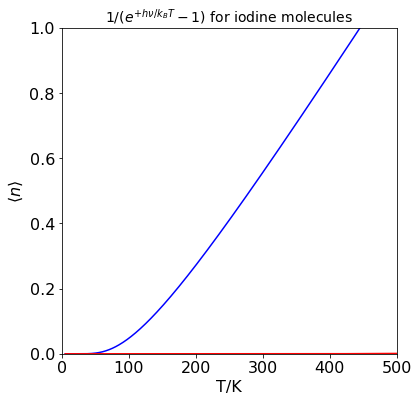

In [7]:
fig = plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots

kB   = 1.38054e-23          # J /K
h    = 6.62559e-34          # SI units  Js
c    = 2.997925e10          # cm/s
nu_I2 = 214.56              # iodine quantum cm^(-1)
nu_N2 = 2359.35             # nitrogen

maxT = 500
T = np.linspace(5,maxT,500)
av_n = lambda T,nu : 1.0/( np.exp( h*c*nu/(kB*T) ) - 1)

plt.plot(T,av_n(T,nu_I2),color='blue')
plt.plot(T,av_n(T,nu_N2),color='red')

plt.title(r'$1/(e^{+h\nu/k_BT}-1)$'+' for iodine molecules',fontsize=14)
plt.xlabel('T/K')
plt.ylabel(r'$\langle n \rangle$')
plt.axis([0,maxT,0,1])
plt.show()

Figure 18. Plot of the average number of vibrational quanta $\langle n \rangle$ populated vs temperature for I$_2$. Notice how small a number this is at room temperature. The similar curve for N$_2$ (red) is so close to zero that it is barely visible on this temperature scale.
